### Maestría en Ciudades Sostenibles

# Manejo y Análisis de Datos

***
## Álgebra Lineal con Numpy

Mateo Neira
***

Tanto para los Modelos de Interacción Espacial como para las Redes Urbanas es importante tener un conocimiento básico de los conceptos de álgebra lineal y ser capaz de trabajar y manipular vectores y matrices en python. 

En este laboratorio cubriremos los conceptos básicos de cómo trabajar con numpy, que servirá como base para el resto de las prácticas de este módulo.

**Objetivos**
* Repasar las funciones básicas de numpy
* definir un vector y calcular la longitud de un vector y el producto punto
* definir una matriz y calcular una multiplicación, transposición e inversa de una matriz
* valores y vectores propios

## Numpy

Numpy es el paquete fundamental para la computación científica con Python. Proporciona funciones numéricas en _ndarray_, que son estructuras de datos de matriz n-dimensional de tamaño fijo. Numpy está implementado en C, donde su memoria se almacena de manera más eficiente.

Los arreglos de Numpy forman el núcleo de casi todo el ecosistema de herramientas de ciencia de datos en Python, por lo que el tiempo invertido en aprender a usar numpy de manera efectiva será útil no solo en este módulo, sino también en otras aplicaciones de ciencia de datos. Aquí usaremos _ndarray_ para representar vectores y matrices.

Podemos importar numpy usando:

```python
import numpy as np
```

In [ ]:
### primero importemos la librería numpy
import numpy as np

np?

Type:        module
String form: <module 'numpy' from '/Users/silver/anaconda3/envs/urbsim/lib/python3.12/site-packages/numpy/__init__.py'>
File:        ~/anaconda3/envs/urbsim/lib/python3.12/site-packages/numpy/__init__.py
Docstring:  
NumPy
=====

Provides
  1. An array object of arbitrary homogeneous items
  2. Fast mathematical operations over arrays
  3. Linear Algebra, Fourier Transforms, Random Number Generation

How to use the documentation
----------------------------
Documentation is available in two forms: docstrings provided
with the code, and a loose standing reference guide, available from
`the NumPy homepage <https://numpy.org>`_.

We recommend exploring the docstrings using
`IPython <https://ipython.org>`_, an advanced Python shell with
TAB-completion and introspection capabilities.  See below for further
instructions.

The docstring examples assume that `numpy` has been imported as ``np``::

  >>> import numpy as np

Code snippets are indicated by three greater-than si

Hay diferentes tipos de objetos (o estructuras) en álgebra lineal:
* Escalar: Un solo número
* Vector: Arreglo de números
* Matriz: Arreglo bidimensional de números
* Tensor: Arreglo N-dimensional de números donde n > 2

### Arreglos de Numpy - Vectores

![1d-array](https://raw.githubusercontent.com/mateoneira/urban_simulation/main/practicals/week1/images/1d.png)

> $x \in \mathbb{R}^n$
 
Un ndarray unidimensional representa un vector de elementos.

Por ejemplo, podemos crear el siguiente vector $\vec{x} = \begin{bmatrix}2 & 3 & 4 \end{bmatrix}$ en numpy:

```python
x = np.array([2,3,4])
```

In [ ]:
### crear un arreglo 1d
x=np.array([1,1,1,1,1,1,1,2,2,3,4,5,6,7,8,10])

print (x.ndim)
print (x.size)
print (x.shape)

# similar al tipo de dato de python (int,float,bool)
print (x.dtype)

1
16
(16,)
int64


### Arreglos de Numpy - Matriz

![matrix](https://raw.githubusercontent.com/mateoneira/urban_simulation/main/practicals/week1/images/2d.png)

> $X \in \mathbb{R}^{n*m}$

Un ndarray bidimensional representa una matriz de elementos.

Por ejemplo, podemos crear la siguiente matriz $ X = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix}$ en numpy:

> X = np.array([[1, 2, 3], [4, 5, 6]])

In [ ]:
### crear un arreglo 2d
X=np.array([[1,2,3],
            [4,5,6]])

print (X.ndim)
print (X.size)
print (X.shape)
print (X.dtype)

2
6
(2, 3)
int64


### Arreglos de Numpy - Arreglos multidimensionales (Tensores)

![tensor](https://raw.githubusercontent.com/mateoneira/urban_simulation/main/practicals/week1/images/3d.png)

También podemos usar ndarray para crear arreglos multidimensionales. Estos a menudo son útiles para representar tensores.

Las imágenes, por ejemplo, se pueden representar como un arreglo tridimensional donde la forma = (canal, alto, ancho).

```python
X = np.array([ [[1, 2],[4, 5]],
               [[2, 5], [6, 4]],
               [[2, 5],[6, 4]]])
```

In [ ]:
### crear un arreglo 3d
X=np.array( [[[1, 2], [4, 5]],
             [[2, 5], [6, 4]],
             [[2, 5], [6, 4]]])

print (X.ndim)
print (X.size)
print (X.shape)
print (X.dtype)

3
12
(3, 2, 2)
int64


### indexación

Los elementos individuales en los arreglos se pueden recuperar usando el indexador []. También podemos usar el indexador [] para establecer los valores de los elementos individuales del arreglo. Python tiene indexación cero, lo que significa que se debe acceder al primer elemento con el índice 0.

```python 
x[0] = 5
```

In [ ]:
x=np.array([5,3,8,9])

### indexación
print(x[0])

### establecer el valor de un elemento individual
### esto establecerá el segundo elemento en el vector a 0
x[1]=0
print(x)

5
[5 0 8 9]


En arreglos multidimensionales, se puede acceder a los elementos utilizando una tupla de índices separados por comas.

Por ejemplo, al elemento $x_{1,2}$ de la matriz $X$ se puede acceder usando:

```python
X[0,1]
```

In [6]:
X = np.array([[1, 2, 3], [4, 5, 6]])
print(X)
print(X[0,1])

X[0,1] = 10
X

[[1 2 3]
 [4 5 6]]
2


array([[ 1, 10,  3],
       [ 4,  5,  6]])

Los valores también se pueden modificar en arreglos multidimensionales utilizando la misma notación de índice.

In [7]:
X[1,2]=10
X

array([[ 1, 10,  3],
       [ 4,  5, 10]])

### rebanado (slicing)

De la misma manera que podemos usar [] para acceder a elementos individuales, también podemos usarlos para acceder a sub-arreglos con la notación de *rebanada* (slice) usando dos puntos (:).

```python 
x[inicio:parada:paso]
```

Por defecto, estos valores toman inicio = 0, parada = tamaño de la dimensión, paso = 1

In [ ]:
### obtener los dos primeros elementos
print(x)
x[:2]

[5 0 8 9]


array([5, 0])

In [ ]:
### obtener todos los elementos después del segundo
x[2:]

array([8, 9])

In [ ]:
## elementos en el medio del arreglo
x[2:4]

array([8, 9])

In [ ]:
## similarmente con arreglos multidimensionales
## obtener las primeras 2 columnas y las primeras 2 filas
print(X)
X[:2,:2]

[[ 1 10  3]
 [ 4  5 10]]


array([[ 1, 10],
       [ 4,  5]])

### remodelación (reshaping)

La remodelación es otra operación útil y se puede llamar usando el método _.reshape_.

Como ejemplo, podemos crear un arreglo de los números del 1 al 9 y remodelarlo en una cuadrícula de 3 x 3:

```python
x = np.arange(1,10)
X = x.reshape((3,3))
```

In [ ]:
# .arange() crea valores espaciados uniformemente con un intervalo dado
x = np.arange(1,10)
X = x.reshape((3,3))
print(x)
print(X)

[1 2 3 4 5 6 7 8 9]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


### función matemática

Hasta ahora hemos estado discutiendo algunos de los conceptos básicos de numpy, básicamente creando, accediendo y modificando _ndarrays_. Sin embargo, el poder de **numpy** reside en su interfaz fácil y flexible para optimizar el cálculo sobre estos _ndarrays_.

### aritmética de arreglos

Podemos usar los operadores aritméticos nativos de Python en _ndarrays_. Por ejemplo, se pueden usar la suma, resta, multiplicación y división estándar.

In [ ]:
# operaciones aritméticas en arreglos
x = np.array([1, 2, 3])

print (x + 1)
print (x * 2)
print (x ** 2)

a = np.array([1,2])
b = np.array([1,2,3,4])

a+b

[2 3 4]
[2 4 6]
[1 4 9]


ValueError: operands could not be broadcast together with shapes (2,) (4,) 

Tenga en cuenta que estas operaciones se 'transmiten' (broadcast) al arreglo. En pocas palabras, la 'transmisión' describe cómo numpy trata los arreglos con diferentes formas durante la operación aritmética. Estas operaciones se ejecutan por elementos.

ver: https://numpy.org/doc/stable/user/basics.broadcasting.html

También podemos sumar sobre un eje dado en un arreglo usando el método _.sum()_.

Imagina que tenemos
$ T = \begin{bmatrix} 5 & 2 & 10 \\ 6 & 8 & 4 \\ 10 & 4 & 6  \end{bmatrix}
$ 

representando una matriz de origen-destino. Podemos calcular rápidamente los totales en los orígenes $O_i = \sum_j T_{ij}$ y en los destinos $D_j = \sum_i T_{ij}$:

```python
Origenes = T.sum(axis=1)
Destinos = T.sum(axis=0)
```

In [ ]:
# definir arreglo
T = np.array([[5,2,10],
              [6,8,4],
              [10,4,6]
             ])

# sumar a través de las filas
origenes = T.sum(axis=1)
print(origenes)

# sumar a través de las columnas
destinos = T.sum(axis=0)
print(destinos)

[17 18 20]
[21 14 20]


### productos punto

El producto punto de dos vectores es la suma de los productos de los elementos del primer vector con los elementos correspondientes del segundo vector:

$$ c = a \cdot b $$

```python
c = np.dot(a,b)
```

Los productos punto son una parte esencial en la multiplicación de matrices que discutiremos a continuación.

In [ ]:
# producto punto entre dos arreglos (suma de productos entre los dos arreglos)
v1 = np.array([1,2,3])
v2 = np.array([4,5,6])
np.dot(v1,v2)

np.int64(32)

### operaciones de matriz

Terminaremos esta práctica con operaciones ampliamente utilizadas en álgebra lineal. Las operaciones de matrices para la base de muchos de los métodos que utilizamos en las redes urbanas. Aunque gran parte del cálculo se abstraerá una vez que comencemos a usar otros paquetes, como networkx, es importante comprender y poder ejecutar estos cálculos directamente con matrices.

In [ ]:
# creemos una matriz cuadrada
X = np.random.randint(10, size = (3,3))
X

array([[2, 5, 1],
       [3, 0, 9],
       [4, 4, 5]])

**matriz identidad**: la matriz identidad contiene unos en la diagonal principal y ceros en todas las demás posiciones.

$$ I = \begin{bmatrix} 1 &  0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1  \end{bmatrix}$$

In [17]:
I = np.identity(3, dtype=int)
I

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

La matriz identidad tiene la propiedad de que cuando se multiplica por cualquier matriz de la misma dimensión, obtenemos la misma matriz.

$$ IX = X $$

### multiplicación de matrices

la multiplicación de matrices se basa en productos punto de las filas de una matriz con las columnas de la otra matriz.

```python
np.matmul(A,B)
```

Dado que las filas de la primera matriz se multiplican por las columnas de la segunda matriz, el número de filas de la primera matriz debe ser igual al número de columnas de la segunda matriz. Tenga en cuenta que debido a esto, la multiplicación de matrices **no es conmutativa**: $AB \neq BA$

In [18]:
A = np.random.randint(5, size = (3,3))
B = np.random.randint(5, size = (3,3))

print(A)
print(B)

np.matmul(A,B)

[[0 4 2]
 [2 2 4]
 [3 3 3]]
[[2 1 3]
 [4 0 3]
 [1 4 0]]


array([[18,  8, 12],
       [16, 18, 12],
       [21, 15, 18]])

### vectores y valores propios

Si tenemos una matriz cuadrada $A$, un vector no nulo $v$ es un vector propio para A con valor propio $\lambda$ si:

$$ A\vec{v} = \lambda \vec{v}$$

Podemos calcular los vectores propios y los valores propios correspondientes de una matriz utilizando las funciones de álgebra lineal de numpy.

```python
np.linalg.eig(A)
```

In [19]:
print(A)
eigen_vals, eigen_vects = np.linalg.eig(A)
print(eigen_vals)
print(eigen_vects)

[[0 4 2]
 [2 2 4]
 [3 3 3]]
[ 7.91143098+0.j         -1.45571549+0.95628324j -1.45571549-0.95628324j]
[[ 0.46712136+0.j          0.78116644+0.j          0.78116644-0.j        ]
 [ 0.59846032+0.j         -0.08378011+0.34640222j -0.08378011-0.34640222j]
 [ 0.65087854+0.j         -0.40101782-0.31929626j -0.40101782+0.31929626j]]


# Aplicaciones

Obtendremos los flujos de origen-destino del metro de Londres de [TfL](http://crowding.data.tfl.gov.uk/). Los datos están en un archivo csv, que podemos leer usando pandas.

In [20]:
import numpy as np
import pandas as pd

In [ ]:
# pandas tiene una gran funcionalidad para leer datos directamente desde la web

# Usamos storage_options para evitar el error 403 Forbidden
url = "https://crowding.data.tfl.gov.uk/NUMBAT/NUMBAT%202024/OD%20Data/NBT24FRI5d_od_network_tb_lf_o.csv"
underground = pd.read_csv(url, storage_options={'User-Agent': 'Mozilla/5.0'})
underground.head()

# explicar rápidamente el significado de las columnas
# Significado de las columnas:
# mnlc_o: Código de la estación de origen (MNLC)
# mnlc_d: Código de la estación de destino (MNLC)
# tb_o: Banda horaria
# vol: Número de viajes (volumen de flujo) para esa banda horaria de origen-destino

,mnlc_o,mnlc_d,tb_o,vol
0,500,501,2,0.240446
1,500,501,3,1.921763
2,500,501,4,1.220755
3,500,501,5,0.823964
4,500,501,6,0.335455


In [ ]:
url = 'https://crowding.data.tfl.gov.uk/NUMBAT/NUMBAT%202019/NBT19_Definitions_Published.xlsx'

# Evitando el error 403 usando storage_options
names = pd.read_excel(url, sheet_name=5, storage_options={'User-Agent': 'Mozilla/5.0'})
names = names.dropna()
names['MNLC'] = names['MNLC'].astype(int)
names = names[names['TFL?']==True]
print("Estaciones de TfL filtradas.")
names.head()

Filtered TfL stations.


,MNLC,MASC,StationName,TFL?
0,500,ACTu,Acton Town,True
1,501,BARu,Barbican,True
2,502,ALDu,Aldgate,True
3,503,ALEu,Aldgate East,True
4,504,STId,Stratford International DLR,True


In [ ]:
# agregar nombres de origen y destino al dataframe, reparar la columna de nombre de la estación
underground = underground.merge(names[['MNLC', 'StationName']], left_on='mnlc_o', right_on='MNLC', how='left').rename(columns={'StationName': 'Origin'}).drop('MNLC', axis=1).merge(names[['MNLC', 'StationName']], left_on='mnlc_d', right_on='MNLC', how='left').rename(columns={'StationName': 'Destination'}).drop('MNLC', axis=1).dropna()
underground.head()

,mnlc_o,mnlc_d,tb_o,vol,Origin,Destination
0,500,501,2,0.240446,Acton Town,Barbican
1,500,501,3,1.921763,Acton Town,Barbican
2,500,501,4,1.220755,Acton Town,Barbican
3,500,501,5,0.823964,Acton Town,Barbican
4,500,501,6,0.335455,Acton Town,Barbican


In [ ]:
# crear una lista de estaciones únicas
stations = list(set(underground['mnlc_o']))

# crear una matriz cuadrada de ceros
matrix = np.zeros((len(stations),len(stations)))

# recorrer las filas del dataframe
for i,row in underground.iterrows():
    # obtener el origen y el destino
    origin = row['mnlc_o']
    destination = row['mnlc_d']
    # obtener el índice de la fila y la columna
    row_index = stations.index(origin)
    col_index = stations.index(destination)
    # agregar el valor a la matriz
    matrix[row_index,col_index] = row['vol']

matrix.shape

(415, 415)

In [ ]:
# podemos hacer esto mucho más fácil en pandas
# Usamos pivot_table con aggfunc='sum' porque hay múltiples bandas horarias (tb_o) por par origen-destino
wide = underground.pivot_table(index='mnlc_o', columns='mnlc_d', values='vol', aggfunc='sum').fillna(0)
# convertir a un arreglo de numpy
matrix = wide.to_numpy()
matrix.shape

(415, 415)

In [26]:
wide.iloc[205, 205]

np.float64(0.0)

In [27]:
matrix[205, 205]

np.float64(0.0)

In [28]:
names.set_index('MNLC', inplace=True)

In [29]:
def lookup_flow(row, column, wide_data=wide, station_names=names):
    rows = wide_data.index
    cols = wide_data.columns
    return station_names.loc[rows[row], 'StationName'] + ' to ' + station_names.loc[cols[column], 'StationName']

def lookup_station(row, wide_data=wide, station_names=names):
    rows = wide_data.index
    return station_names.loc[rows[row], 'StationName']

Cuando construimos una matriz de adyacencia, cada nodo corresponde a una fila y una columna y el valor de cada celda es el número de viajes entre los dos nodos.

Text(0.5, 1.0, 'Adjacency Matrix')

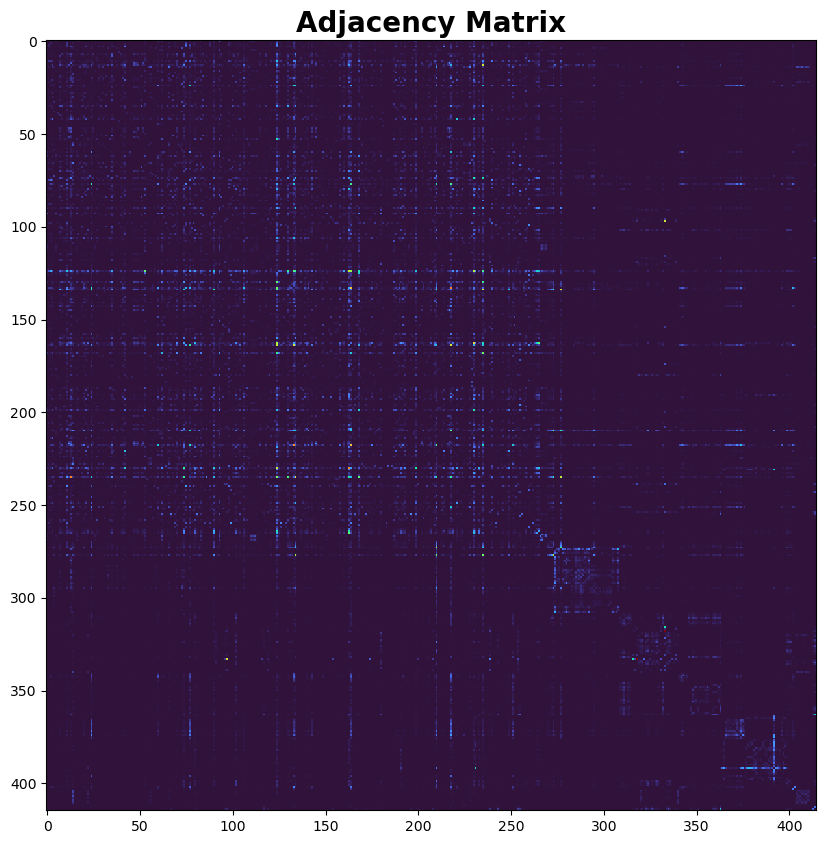

In [ ]:
# graficar la matriz de adyacencia
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,10))
plt.imshow(matrix, cmap='turbo', interpolation='nearest')
plt.title('Matriz de Adyacencia', fontsize=20, weight='bold')

Text(0.5, 1.0, 'Sorted Adjacency Matrix')

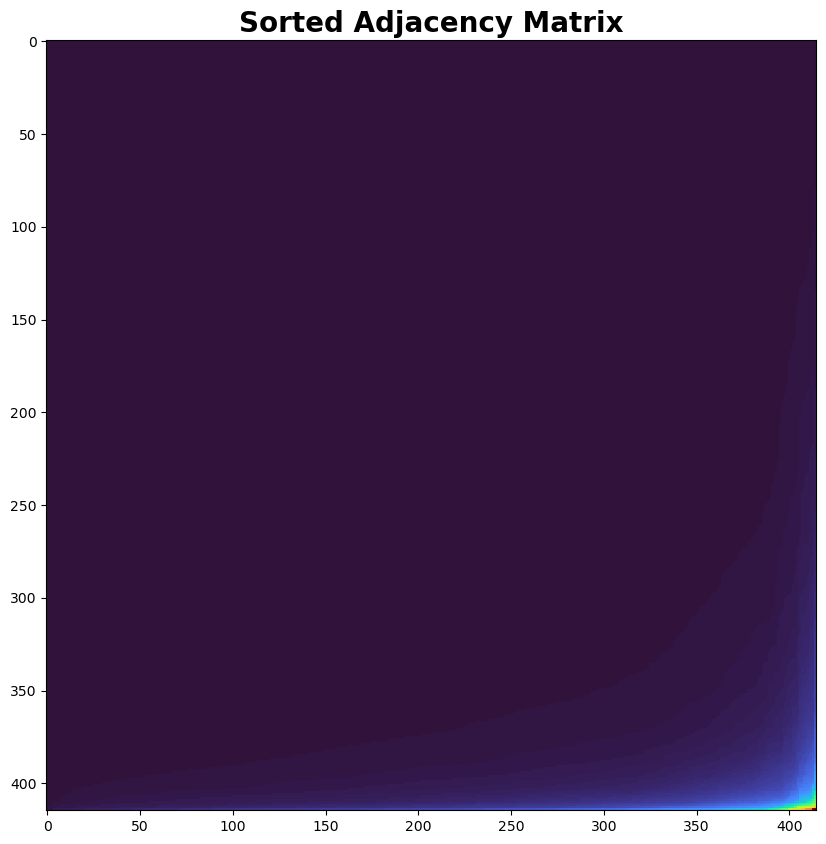

In [ ]:
# ordenar la matriz en ambas dimensiones y luego volver a graficar
plt.figure(figsize=(10,10))
plt.imshow(np.sort(np.sort(matrix, axis=0),axis=1), cmap='turbo', interpolation='nearest')
plt.title('Matriz de Adyacencia Ordenada', fontsize=20, weight='bold')


Text(0.5, 1.0, 'Sorted Adjacency Matrix (log)')

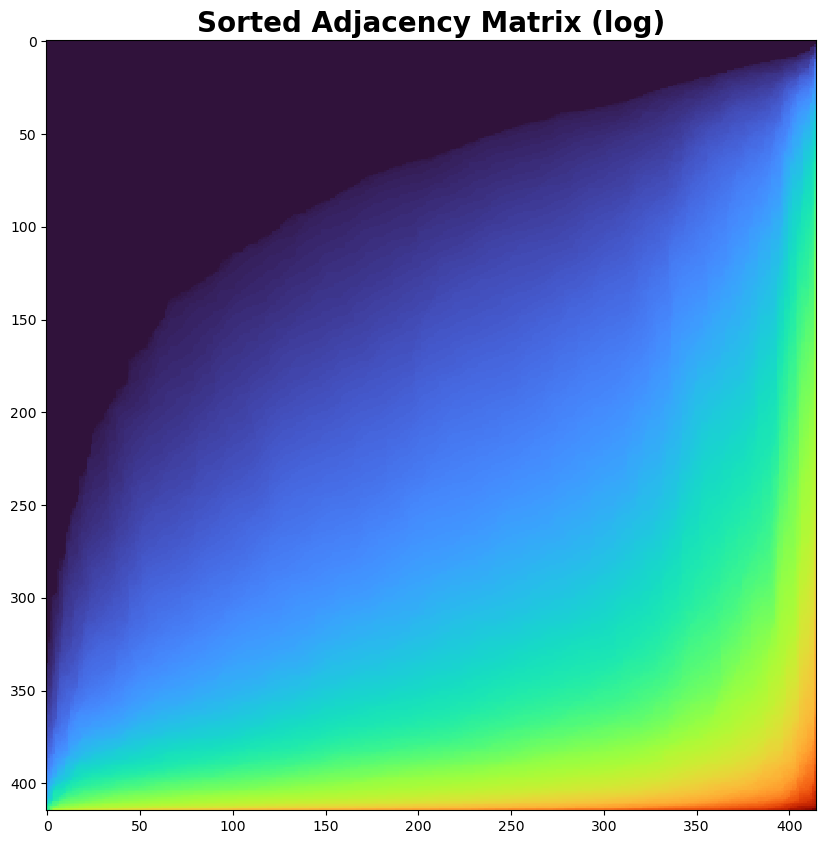

In [ ]:
# intentar de nuevo con cmap en escala logarítmica
from matplotlib.colors import LogNorm
plt.figure(figsize=(10,10))
plt.imshow(np.sort(np.sort(matrix + 1,axis=0),axis=1), cmap='turbo', interpolation='nearest', norm=LogNorm())
plt.title('Matriz de Adyacencia Ordenada (log)', fontsize=20, weight='bold')

In [ ]:
# obtener el valor del índice para el flujo grande
row, col = np.where(matrix == np.max(matrix))
lookup_flow(row[0], col[0])

'Watford Junction to Euston NR'

Text(0.5, 1.0, 'Cosine Similarity Matrix')

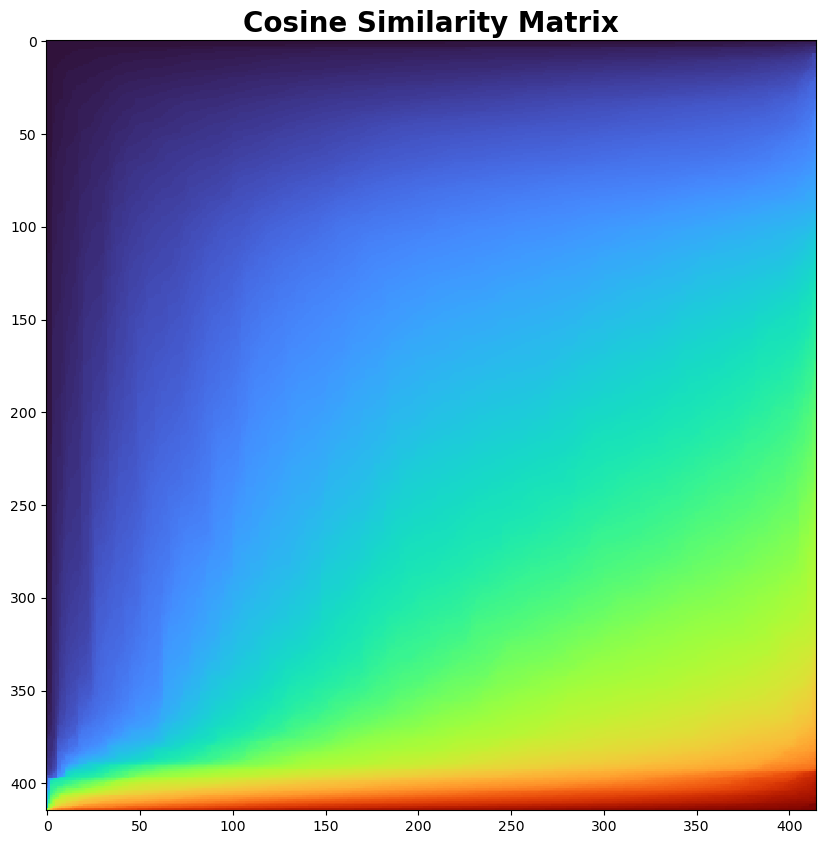

In [ ]:
# encontremos las 2 filas de la matriz con la mayor similitud de coseno
from sklearn.metrics.pairwise import cosine_similarity

# calcular la similitud de coseno entre cada fila y todas las demás filas
cosine_similarities = cosine_similarity(matrix)

# poner a cero la diagonal
np.fill_diagonal(cosine_similarities, 0)

# graficar la matriz de similitud de coseno para la matriz de adyacencia ordenada
plt.figure(figsize=(10,10))
plt.imshow(np.sort(np.sort(cosine_similarities, axis=0),axis=1), cmap='turbo', interpolation='nearest')
plt.title('Matriz de Similitud de Coseno', fontsize=20, weight='bold')

In [ ]:
# ¿qué 2 estaciones tienen la mayor similitud de coseno?
row, col = np.where(np.triu(cosine_similarities, k=1) > 0.95)
for i in range(len(row)):
    print(lookup_station(row[i]) + ' y ' + lookup_station(col[i]))

Amersham and Chesham
Archway and East Finchley
Archway and Highgate
Archway and Tufnell Park
Arnos Grove and Bounds Green
Arnos Grove and Cockfosters
Barkingside and Fairlop
Barkingside and Gants Hill
Barkingside and Hainault
Barkingside and Newbury Park
Barkingside and Redbridge
Becontree and Dagenham East
Becontree and Dagenham Heathway
Becontree and Upney
Blackfriars LU and Mansion House
Boston Manor and Northfields
Boston Manor and South Ealing
Brent Cross and Hendon Central
Caledonian Road and Holloway Road
Cannon Street LU and Mansion House
Canons Park and Queensbury
Canons Park and Stanmore
Pontoon Dock and West Silvertown
Clapham Common and Clapham North
Colliers Wood and South Wimbledon
Dagenham East and Dagenham Heathway
Dagenham East and Upney
Dollis Hill and Neasden
Earl's Court and Gloucester Road
Eastcote and Hillingdon
East Finchley and Highgate
East Finchley and Tufnell Park
East Finchley and Woodside Park
East Putney and Putney Bridge
Fairlop and Gants Hill
Fairlop and

Text(0.5, 1.0, 'Out-degree distribution')

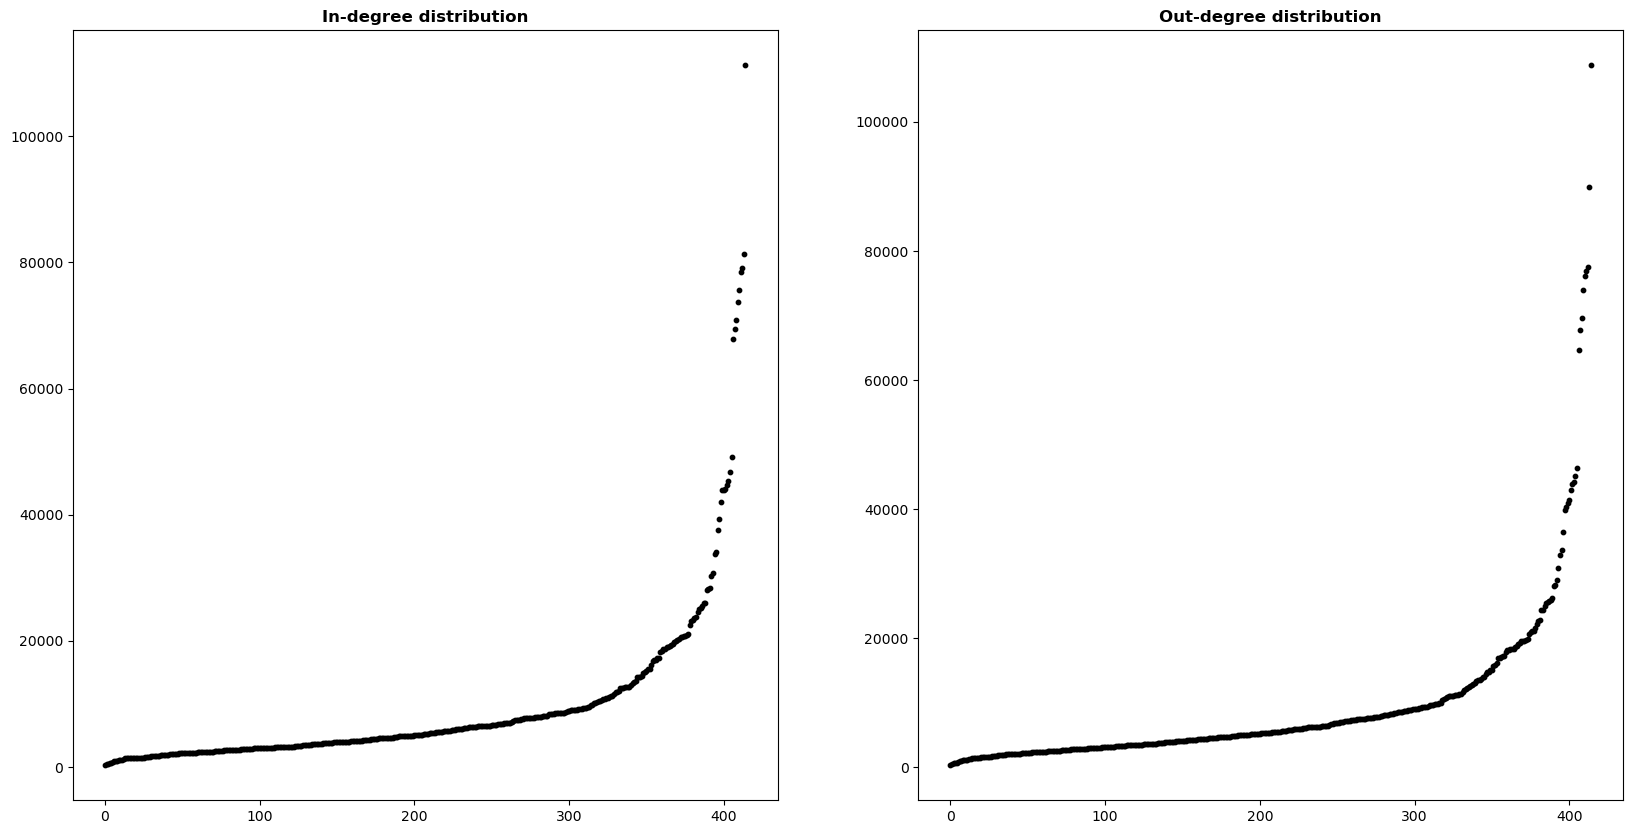

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
# graficar la distribución de grado de entrada (sumas de filas)
axs[0].scatter(range(0, len(matrix)), np.sort(np.sum(matrix, axis=0)), color='k', s=10)
axs[0].set_title('Distribución de grado de entrada', weight='bold')
# graficar la distribución de grado de salida (sumas de columnas)
axs[1].scatter(range(0, len(matrix)), np.sort(np.sum(matrix, axis=1)), color='k', s=10)
axs[1].set_title('Distribución de grado de salida', weight='bold')

In [ ]:
# obtener las 10 estaciones principales por grado de entrada
for i in np.argsort(np.sum(matrix, axis=0))[-10:]:
    print(lookup_station(i))

Bond Street
London Bridge LU
Liverpool Street LU
Paddington TfL
Oxford Circus
Victoria LU
Stratford
Tottenham Court Road
Waterloo LU
King's Cross St. Pancras


### ¿Para qué sirven los vectores propios?

Los vectores propios se utilizan a menudo para comprender la importancia de los nodos en la red. En este caso, estamos pensando en estaciones. La centralidad de vector propio utiliza la multiplicación de matrices para calcular la importancia de un nodo en función de la importancia de sus vecinos, y así sucesivamente. Tomamos una matriz y la multiplicamos iterativamente por otra matriz, comenzando con un vector de unos y luego pasando a los valores resultantes de esa multiplicación. Al final, cada fila tendrá un valor que representa la importancia del nodo correspondiente.

In [ ]:
# ¿cuál será la forma de esta matriz después de que la multipliquemos por un vector de unos?
matrix.shape

(415, 415)

In [ ]:
# normalizar el grado
def normalise(x):
    return x / np.sqrt(np.sum(np.square(x), axis=0))
    # alternativa para normalizar es norm // grado / np.linalg.norm(grado, axis=0)

# inicializar con un arreglo de unos, que solo suma las filas, o calcula el "grado", para iniciar el proceso
eigenvector_centrality = np.ones((len(matrix), 1))

# inicializar una matriz que almacenará todas las puntuaciones de centralidad de vector propio a medida que iteramos
eigenvector_centralities = np.zeros((len(matrix), 100))

# actualizar iterativamente la centralidad de vector propio
for i in range(100):
    eigenvector_centrality = matrix.dot(eigenvector_centrality)
    eigenvector_centrality = normalise(eigenvector_centrality)
    eigenvector_centralities[:, i] = eigenvector_centrality[:, 0]

# Puntuaciones finales de centralidad de vector propio
eigenvector_centrality

array([[1.77213516e-02],
       [2.07422377e-02],
       [3.09257592e-02],
       [5.40266946e-02],
       [1.34003992e-02],
       [6.48284667e-03],
       [4.15820607e-03],
       [5.36708453e-02],
       [3.76205643e-02],
       [1.48456439e-02],
       [1.30761736e-02],
       [1.02517112e-01],
       [4.45078390e-02],
       [1.36617153e-01],
       [5.33981048e-02],
       [6.06844107e-03],
       [2.46431579e-02],
       [1.98523967e-02],
       [1.06447846e-02],
       [2.44063424e-02],
       [5.30962155e-02],
       [3.40375183e-02],
       [4.55382796e-02],
       [5.31956639e-03],
       [1.32328524e-01],
       [1.79008269e-02],
       [4.66109047e-03],
       [2.06186980e-02],
       [1.74207424e-02],
       [8.01655796e-03],
       [1.61272289e-02],
       [1.07844350e-02],
       [1.28092578e-02],
       [1.58148677e-02],
       [2.01222761e-02],
       [9.38562499e-02],
       [9.69415199e-03],
       [9.33061801e-03],
       [1.13889951e-02],
       [4.08079325e-03],


Text(0.5, 1.0, 'Convergence of eigenvector centrality')

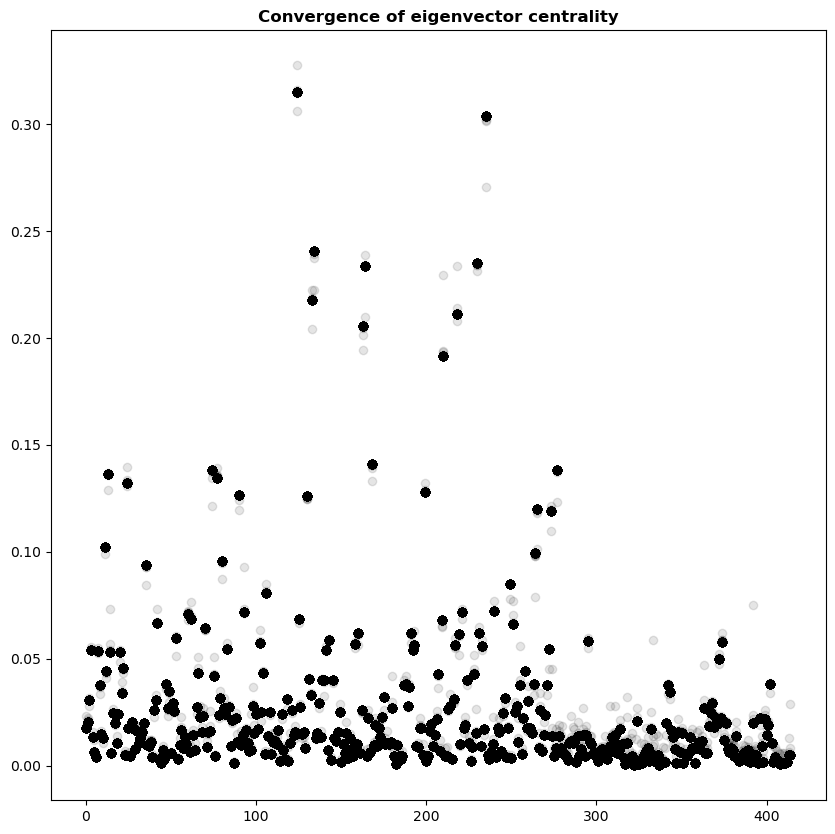

In [ ]:
# graficar la convergencia de las puntuaciones de centralidad de vector propio como un diagrama de dispersión donde cada color es una iteración diferente
fig, ax = plt.subplots(figsize=(10,10))
for i in range(100):
    ax.scatter(np.arange(len(matrix)), eigenvector_centralities[:, i], color='k', alpha=0.1)

ax.set_title('Convergencia de la centralidad de vector propio', weight='bold')

Text(0.5, 1.0, 'Convergence of eigenvector centrality')

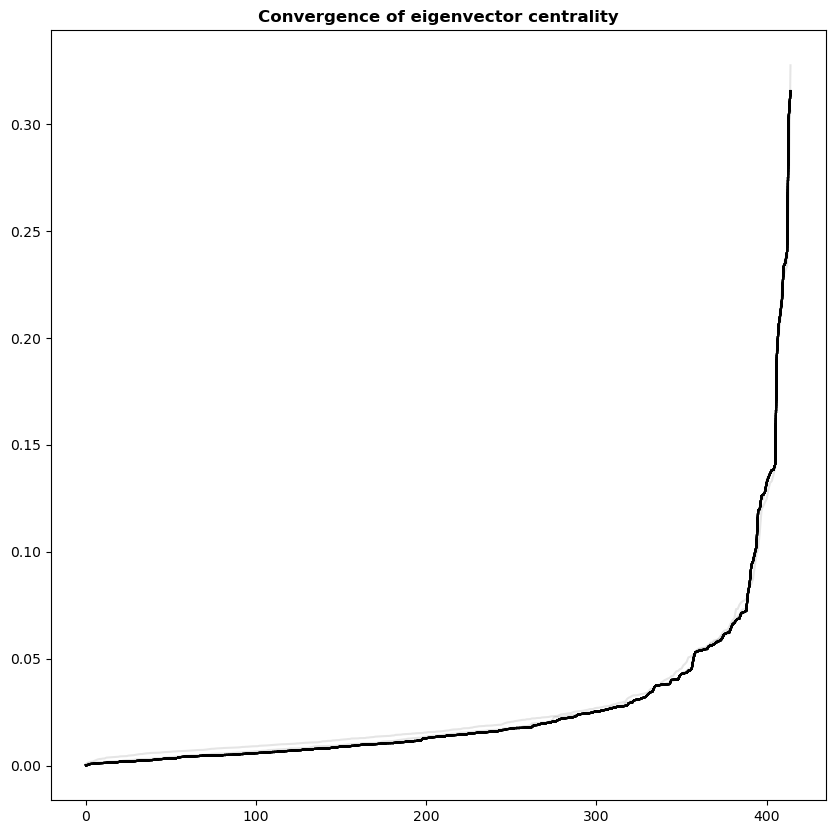

In [ ]:
# graficar el vector propio para cada iteración como un gráfico de líneas ordenado donde cada color corresponde a una iteración diferente
fig, ax = plt.subplots(figsize=(10,10))
for i in range(100):
    ax.plot(np.sort(eigenvector_centralities[:, i]), color='k', alpha=0.1)

ax.set_title('Convergencia de la centralidad de vector propio', weight='bold')

In [ ]:
# obtener el valor del índice de la puntuación más alta de centralidad de vector propio, buscar el nombre de la estación e imprimirlo
lookup_station(eigenvector_centrality.argmax())

"King's Cross St. Pancras"

/Users/silver/anaconda3/envs/urbsim/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/silver/anaconda3/envs/urbsim/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Scipy solution to eigenvector centrality')

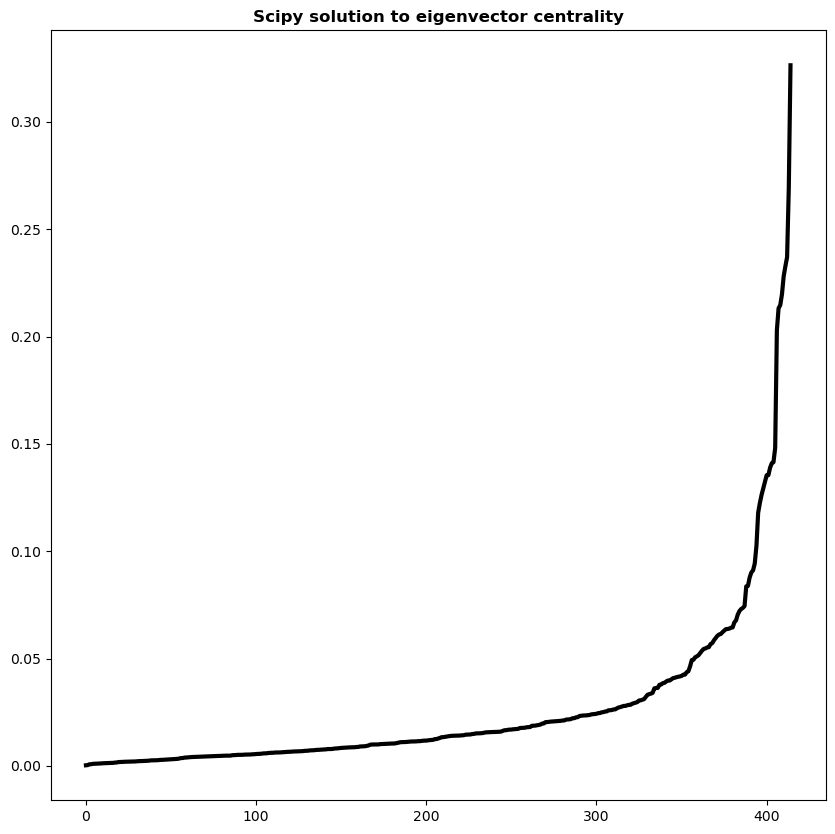

In [ ]:
# crear matriz dispersa de scipy
import scipy as sp
from scipy.sparse import linalg

M = sp.sparse.csr_matrix(matrix)
_, eigenvector = sp.sparse.linalg.eigs(
    M.T, k=1, which="LR", maxiter=20
    )

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(np.sort(eigenvector[:, 0]), color='k', linewidth=3)
ax.set_title('Solución de Scipy para la centralidad de vector propio', weight='bold')

In [ ]:
# crear un grafo de networkx a partir de la lista de aristas
import networkx as nx

In [ ]:
G = nx.from_pandas_edgelist(underground, source='Origin', target='Destination', edge_attr='vol')

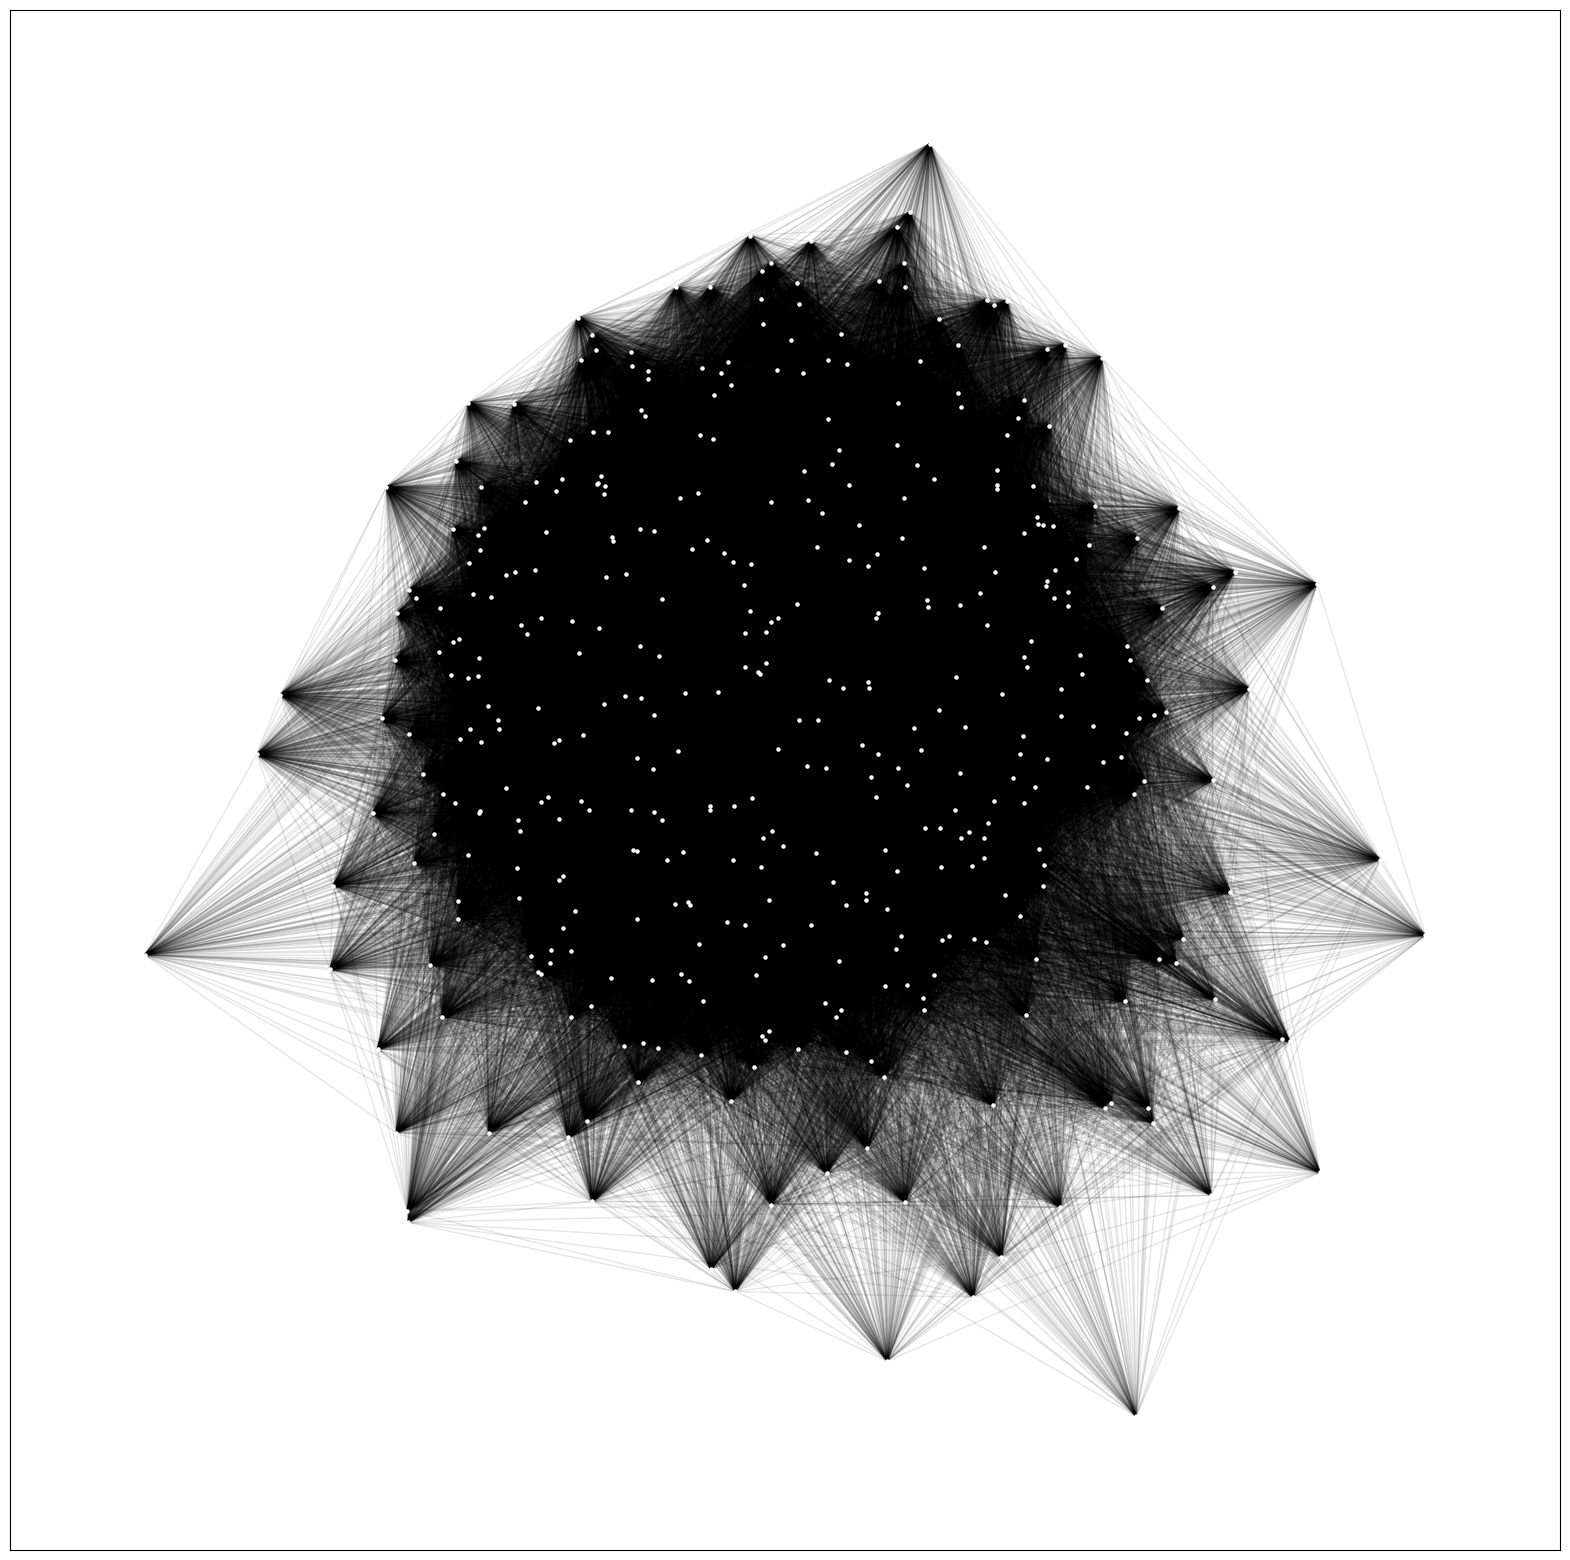

In [ ]:
# graficar la red
fig, ax = plt.subplots(figsize=(20, 20))

# dibujar las aristas
nx.draw_networkx_edges(G, pos=nx.spring_layout(G, seed=42), alpha=0.1, ax=ax)
# dibujar los nodos
nx.draw_networkx_nodes(G, pos=nx.spring_layout(G, seed=42), node_size=5, node_color='w', ax=ax)

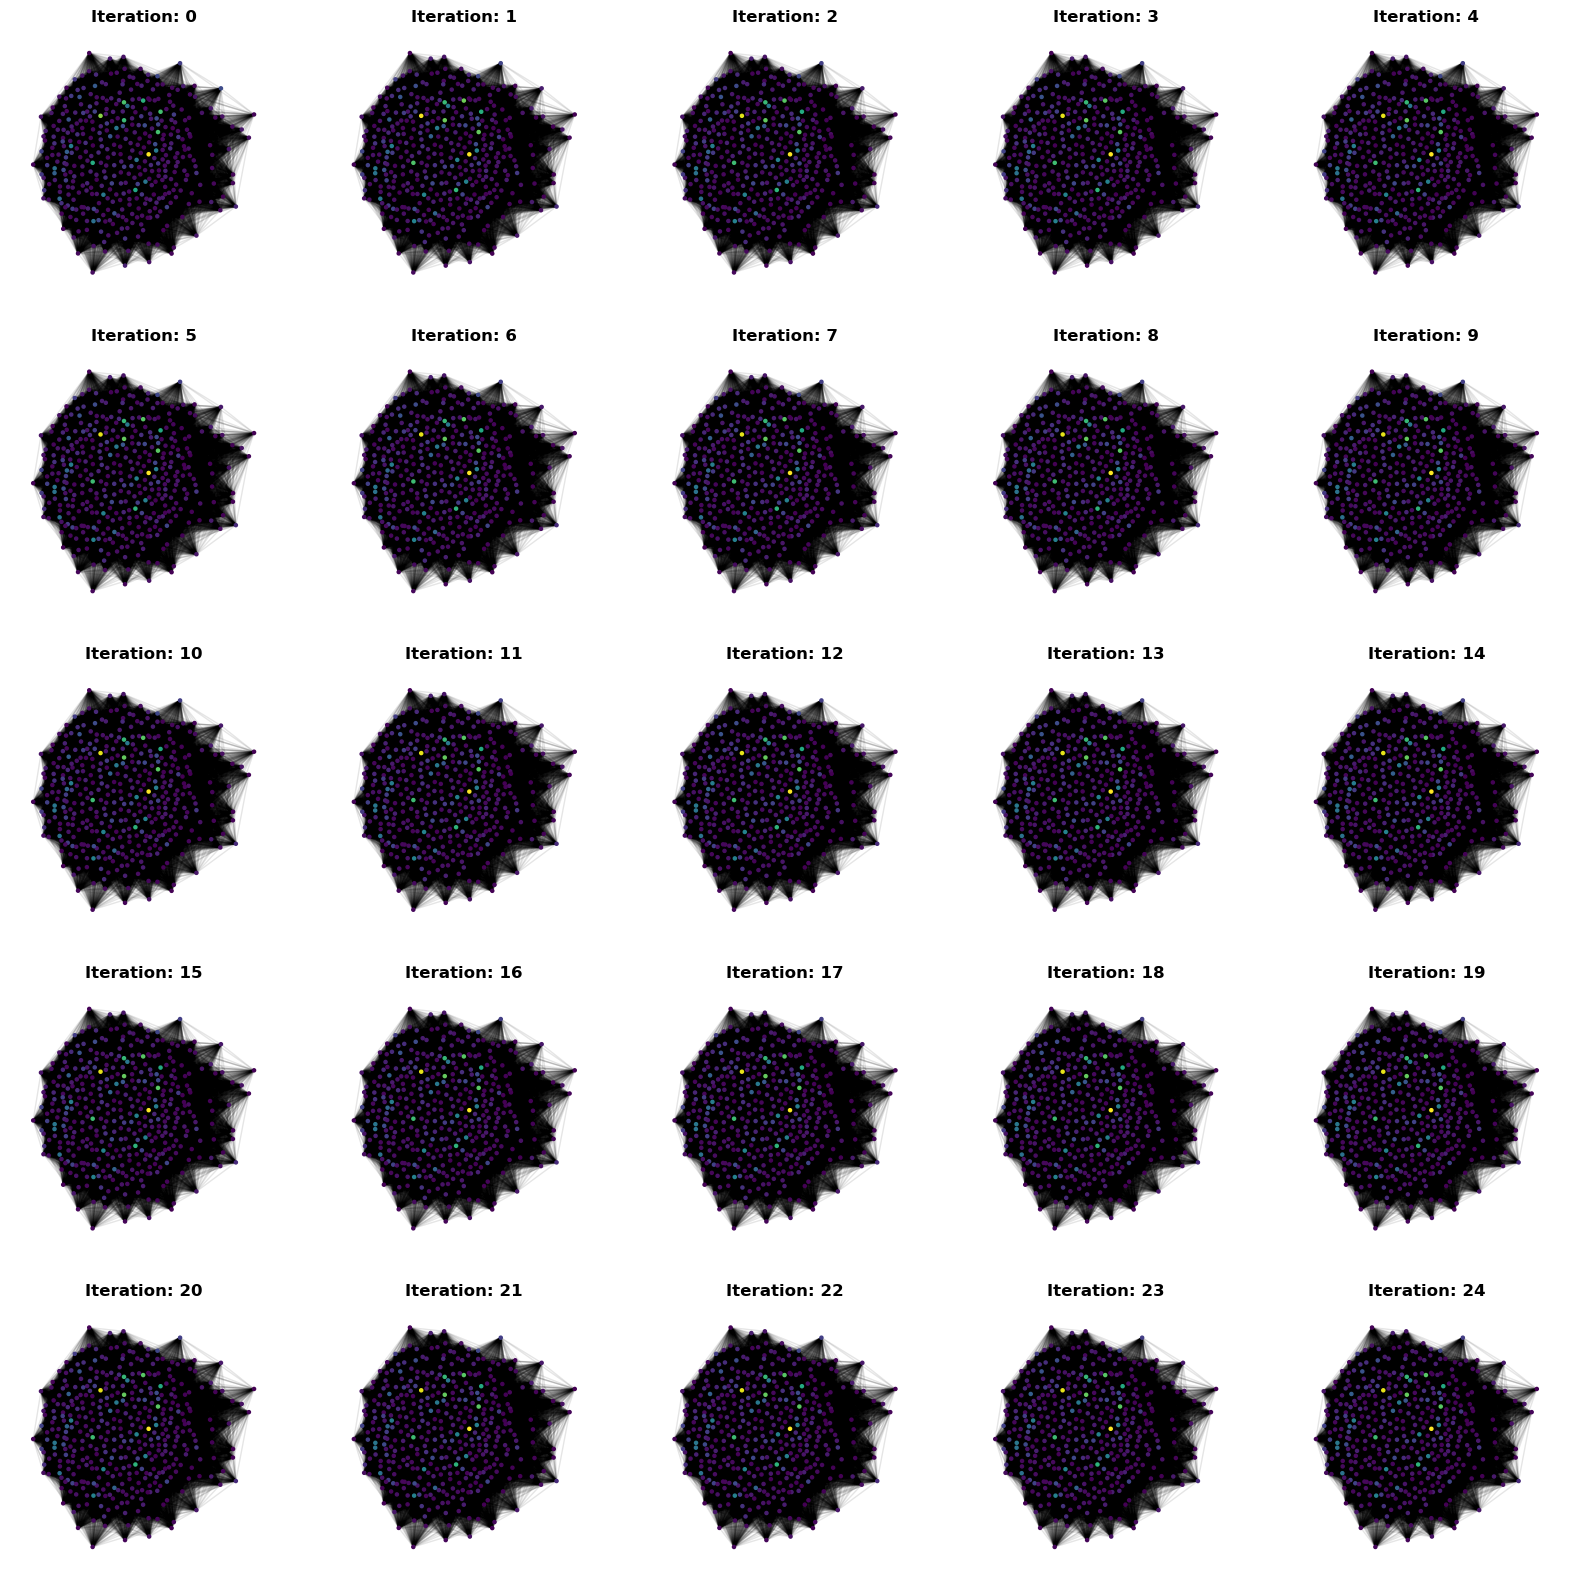

In [ ]:
# crear una figura de 10 x 10
fig, axs = plt.subplots(5, 5, figsize=(20,20))
axs = axs.ravel()

# usemos el diseño kamada-kawai
pos = nx.kamada_kawai_layout(G)

# recorrer las primeras 25 puntuaciones de centralidad de vector propio
for i in range(25):
    # asignar color al nodo
    c = dict(zip(list(G.nodes()),  eigenvector_centralities[:, i]))
    # dibujar las aristas
    nx.draw_networkx_edges(G, pos=pos, alpha=0.1, ax=axs[i])
    # dibujar los nodos coloreados según la centralidad de vector propio
    nx.draw_networkx_nodes(G, pos=pos, node_size=5, node_color=list(c.values()), ax=axs[i])
    # establecer el título
    axs[i].set_title('Iteración: ' + str(i), weight='bold')
    # eliminar el eje
    axs[i].axis('off')

¿Tiene esto algún sentido? ¿Qué significa ser adyacente a otras estaciones concurridas en una red de tránsito?

### Referencias

* Python for Data Analysis: Data Wrangling with Pandas, NumPy, and Ipython (Wes McKinney)


* Referencia de Numpy: https://numpy.org/doc/stable/reference/index.html